**Numeric Simulation of Laser around the Threshold**

- author: Longfei Fan
- date: 05/03/2017

**Abstract**

In this note, I study some properties of laser around the threshold, including photon statistics, von Neumann entorpy, and the second order coherence. First, three numeric examples are given for lasers operated $20\%$ above the threshold, at the threshold, and $20\%$ below the threshold. I show how do their properties changes with repesct to time. Then I show that phase transition happens around the threshold by plot the values of average photon numbers, von Neumann entorpy, and the second oder coherent for a steady laser state.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import poisson

from qutip import *
import laser

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser

In [12]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

# Theoretical Analysis


**Equation of Motion for the Density Matrix of the Cavity Field**

For the density of the cavity field $\rho_{nm}$, we have differential equations given by

$$
\begin{aligned}
\dot{\rho}_{nm} =
&- \frac{M_{nm}A}{1 + N_{nm}B/A} \rho_{nm} + \frac{\sqrt{nm}A}{1 + N_{n-1,m-1}B/A} \rho_{n-1,m-1} \\
&- \frac{C}{2}(n+m)\rho_{nm} + C\sqrt{(n+1)(m+1)} \rho_{n+1, m+1}
\end{aligned}
$$

where
$$
\begin{aligned}
A &= \frac{2r_a g^2}{\gamma^2},\\
B &= \frac{4g^2}{\gamma^2} A,\\
M_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{8A},\\
N_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{16A}.
\end{aligned}
$$

**Equations for diagonal terms**

It's seen that only diagonal terms are coupled together. Therefore we would have several groups of equations which are decoupled from each other. In particular, for the main diagonal elements, the group of euqations we have are given by

$$
\begin{aligned}
\dot{p}(n) =
&- \frac{(n+1)A}{1 + (n+1)B/A} p(n) + \frac{nA}{1 + nB/A} p(n-1) \\
&- Cnp(n) + C(n+1)p(n+1)
\end{aligned}
$$

If the cavity state starts from a vaccum state, only $\rho_{00}~(p_0)$ is non-zero at the very beginning. Only main diagonal terms are coupled with $\rho_{00}$, so only main diagonal terms will become non-zero during evolution. Other offset diagonal terms will keep zero during the evolution. So we can get the whole density matrix by just solving the main diagonal terms.

# Numeric Simulation

**Tuning Paramters**

The average photon number for laser operated above the threshold is given by

$$
\bar{n} = \frac{A}{C} \frac{A - C}{B} = \frac{A}{C} \frac{A - C}{4g^2A/\gamma^2} = (\alpha - 1) \frac{\gamma^2}{4 g^2}
$$

The ratio is given by

$$
\alpha = \frac{A}{C} = \frac{r_a}{2C} \frac{4g^2}{\gamma^2}
$$

Recall that the effective pumping rate is defined by

$$
r_a = \frac{\gamma \lambda}{\gamma + \lambda} = \frac{\gamma}{1 + \lambda / \gamma}
$$

As both $\gamma$ and $\lambda$ are positve but smaller than one, $r_a$ also falls within $0$ and $1$.

**Parameters Used for the Atom and Cavity**

In this numeric simulation, I shall explore how properties of laser changes around the threshold $(A/C=1)$. Since there are many parameters to be considered, we have to make something fixed. Here I use fixed values for the interaction strength, the atom decay rate, and the cavity decay rate. To varying values of pumping rate, I can change the ratio of $A/C$.

- interaction strength: $g = 0.001000$
- atom decay rate: $\gamma = 0.063246$
- cavity decay rate: $C = 0.000100$

**Initial States**

- cavity: vaccum state $\lvert 0 \rangle$
- atom: ground state $\lvert g \rangle$

**Considerations on Chosen of Parameters**

Here we want to make simulations under the linear approximation where $B$ is nearly zero, i.e. $B$ is much smaller thant $A$. Here I set the ratio of $A/B$, $4g^2/\gamma^2 = 10^{-3}$. Therefore $\gamma = \sqrt{4000} g$. And now $r_a = 2 (\gamma^2/4g^2) \alpha C = 2000 \alpha C$. To make sure that $r_a < 1$, I have to choose much small value for $C$. Here I set $C = 10^{-4}$. Then $r_a < 1$ is satified if $\alpha < 5.$

In [26]:
# parameters
# w_c = 2.0 * np.pi
# w_a = 2.0 * np.pi

g = 0.001
gamma = np.sqrt(4000) * g
kappa = 0.0001

In [27]:
gamma

0.063245553203367583

## 1. 20% above threshold

- A = 1.2 e-4
- B = 1.2 e-7
- C = 1.0 e-4

Average photon number is 200 (checked by simulation). (This is an example given in Chapter 11 of _Quantum Optics_ by Scully and Zubairy.)

In [28]:
# initial cavity state
N_maxp = 1000
n_listp = np.arange(N_maxp)
init_psip = fock(N_maxp, 0)

In [19]:
ra = 0.24 # pumping rate
lp = laser.LaserOneMode(g, ra, gamma, kappa) # create laser object

In [20]:
lp.get_abc() # master equation parameters

{'A': 0.00012, 'B': 1.2000000000000002e-07, 'C': 0.0001}

In [21]:
# average photon number of the steady state
lp_avern = lp.aver_n_above()
lp_avern

199.99999999999994

In [22]:
# list of time for ode
t_listp = np.linspace(0, 700000, 1001)
# state evolution
lp.pn_evolve(init_psip, N_maxp, t_listp)

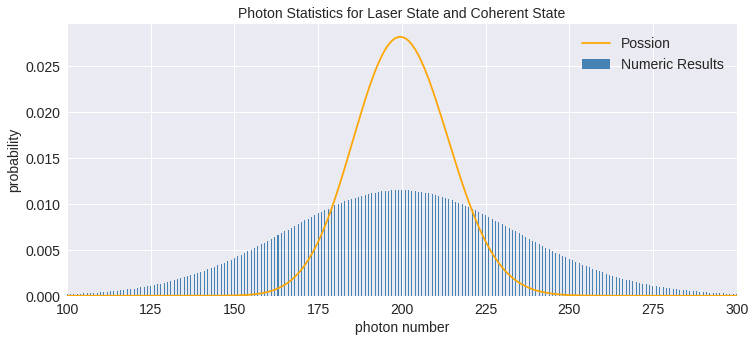

In [13]:
# make a comparison between a laser state and a coherent state
# with the same average photon numbers
# operated above the threshold by 20%
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(n_listp, lp.get_pns()[-1], width=0.3, 
        color="steelblue", label="Numeric Results")
ax.plot(n_listp, poisson.pmf(n_listp, lp_avern), 
        color="orange", label="Possion")
ax.set_title("Photon Statistics for Laser State and Coherent State", 
             fontsize=14)
ax.set_xlabel("photon number", fontsize=14)
ax.set_ylabel("probability", fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(100, 300)
ax.tick_params(axis='both', which='major', labelsize=14);

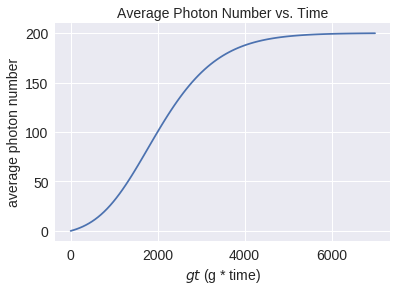

In [23]:
# plot average photon numbers vs. time
lp.plot_n_vs_time();

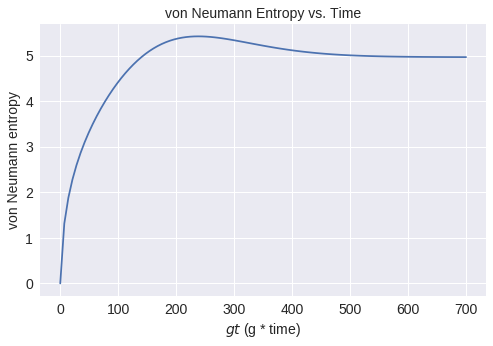

In [164]:
# plot entroy vs. time
lp.plot_entropy_vs_time();

## 2. At the threshold

- A = 1.0 e-4
- B = 1.0 e-7
- C = 1.0 e-4

In [178]:
# initial cavity state
N_maxa = 150
n_lista = np.arange(N_maxa)
init_psia = fock(N_maxa, 0)

In [179]:
ra = 0.20
la = laser.LaserOneMode(g, ra, gamma, kappa)

In [180]:
la.get_abc()

{'A': 0.00010000000000000002, 'B': 1.0000000000000004e-07, 'C': 0.0001}

In [181]:
# list of time for ode
t_lista = np.linspace(0, 1000000, 1001)
# evolution
la.pn_evolve(init_psia, N_maxa, t_lista)

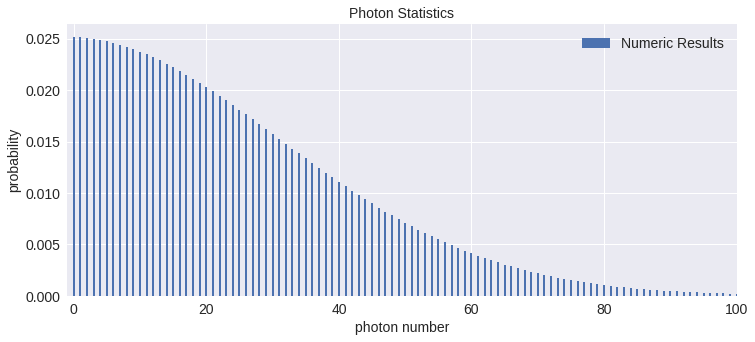

In [184]:
fig, ax = plt.subplots(figsize=(12, 5))

w = 0.35
ax.bar(np.arange(N_maxa), la.get_pns()[-1], width=0.3, label="Numeric Results")
# ax.bar(np.arange(N_max) + w, laser.boltzmann(0.8, N_max), width=w, 
#        label="Boltzmann Distribution")
ax.legend(fontsize=14)
ax.set_xlim(-1, 100)
ax.set_xlabel("photon number", fontsize=14)
ax.set_ylabel("probability", fontsize=14)
ax.set_title("Photon Statistics", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14);

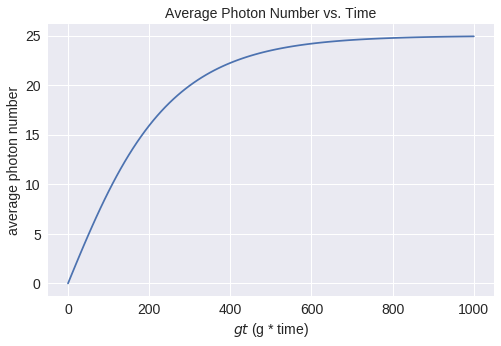

In [185]:
la.plot_n_vs_time();

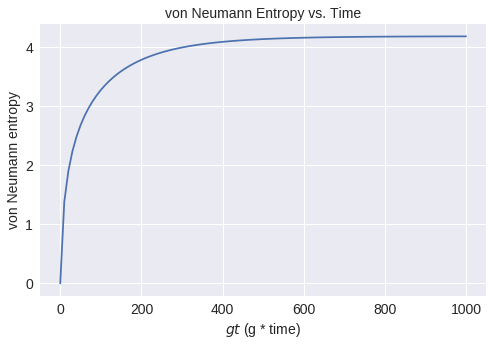

In [186]:
la.plot_entropy_vs_time();

## 3. 20% below threshold

- A = 0.8 e-4
- B = 0.8 e-7
- C = 1.0 e-4

In [187]:
# initial cavity state
N_maxm = 40
n_listm = np.arange(N_maxm)
init_psim = fock(N_maxm, 0)

In [189]:
ra = 0.16
lm = laser.LaserOneMode(g, ra, gamma, kappa)

In [190]:
lm.get_abc()

{'A': 8.000000000000002e-05, 'B': 8.0000000000000041e-08, 'C': 0.0001}

The average photon number is estimated by

$$
\frac{1}{e^{{\hbar \nu} / {k T}} - 1} = \frac{1}{C/A - 1} = 4
$$

In [192]:
# list of time for ode
t_listm = np.linspace(0, 400000, 1001)
# evolution
lm.pn_evolve(init_psim, N_maxm, t_listm)

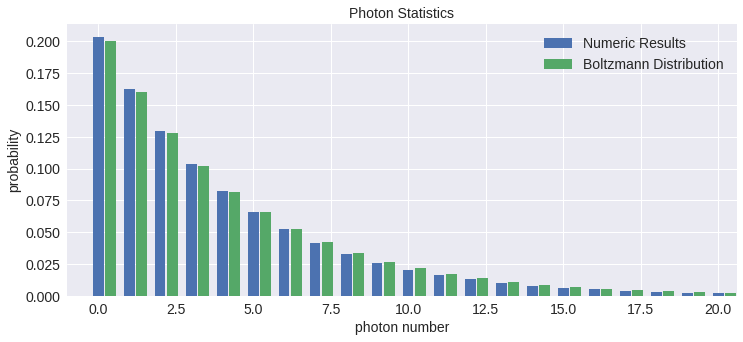

In [193]:
fig, ax = plt.subplots(figsize=(12, 5))

w = 0.35
ax.bar(np.arange(N_maxm), lm.get_pns()[-1], width=w, 
       label="Numeric Results")
ax.bar(np.arange(N_maxm) + w + 0.05, laser.boltzmann(0.8, N_maxm), width=w, 
       label="Boltzmann Distribution")
ax.legend(fontsize=14)
ax.set_xlim(-1, 20.6)
ax.set_xlabel("photon number", fontsize=14)
ax.set_ylabel("probability", fontsize=14)
ax.set_title("Photon Statistics", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14);

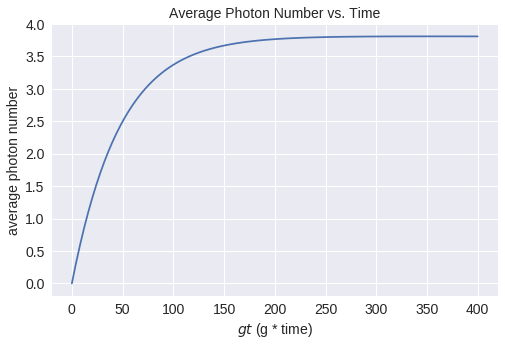

In [194]:
lm.plot_n_vs_time();

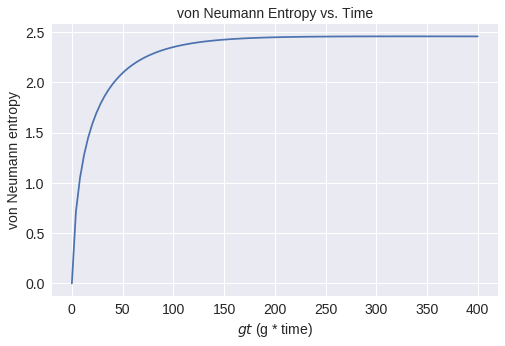

In [195]:
lm.plot_entropy_vs_time();

## 4. Steady values around the threshold

In [196]:
# parameters
g = 0.001
gamma = np.sqrt(4000) * g
kappa = 0.0001

# initial cavity state
N_max = 2000
n_list = np.arange(N_max)
init_psi = fock(N_max, 0)

In [213]:
ratios, ns, entrs, g2s = [], [], [], []
a = destroy(N_max)

for ra in np.arange(0.005, 0.4, 0.005):
    l = laser.LaserOneMode(g, ra, gamma, kappa) # create laser object
    l.set_N_max(N_max)
    
    pn, n, entr = l.solve_steady_state()
    rho = Qobj(np.diag(pn))
    g2 = expect(a.dag() * a.dag() * a * a, rho) / n**2
    
    ratios.append(2 * ra * g**2 / gamma**2 / kappa)
    ns.append(n)
    entrs.append(entr)
    g2s.append(g2)

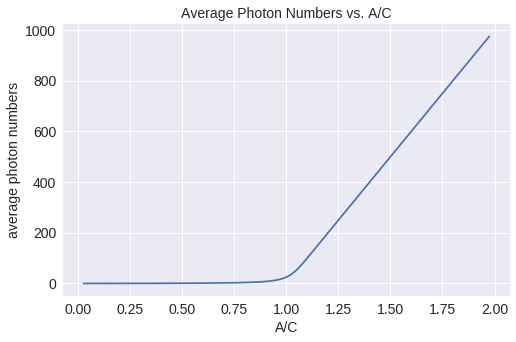

In [214]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ratios, ns)
ax.set_title("Average Photon Numbers vs. A/C", fontsize=14)
ax.set_xlabel("A/C", fontsize=14)
ax.set_ylabel("average photon numbers", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14);

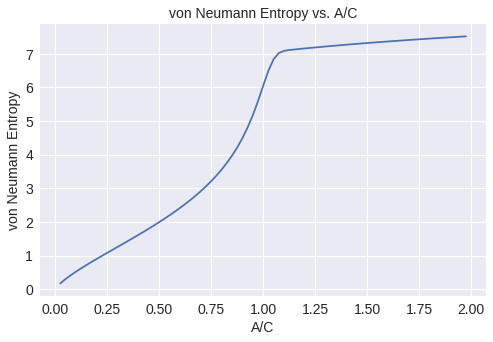

In [215]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ratios, entrs)
ax.set_title("von Neumann Entropy vs. A/C", fontsize=14)
ax.set_xlabel("A/C", fontsize=14)
ax.set_ylabel("von Neumann Entropy", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14);

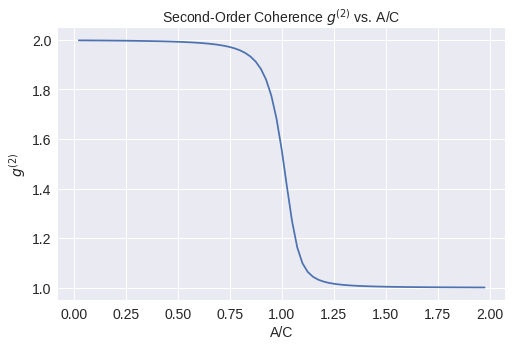

In [216]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ratios, g2s)
ax.set_title("Second-Order Coherence $g^{(2)}$ vs. A/C", fontsize=14)
ax.set_xlabel("A/C", fontsize=14)
ax.set_ylabel("$g^{(2)}$", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14);